**Installing Dependencies**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

**Loading Dataset**

In [39]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [40]:
#displaying dataset
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

**Creating DataFrame**

In [41]:
# loading the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [42]:
#first 10 rows
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [43]:
# adding the 'target' column to the data frame 
# here , 1 -> Benign and 0 -> Malignant
df['Diagnosis'] = breast_cancer_dataset.target

In [44]:
#bottom 10 rows
df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [45]:
# num of rows and columns in the df
df.shape

(569, 31)

**Data Preprocessing**

In [46]:
# df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
# df statistical measures
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [48]:
# null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

<AxesSubplot:>

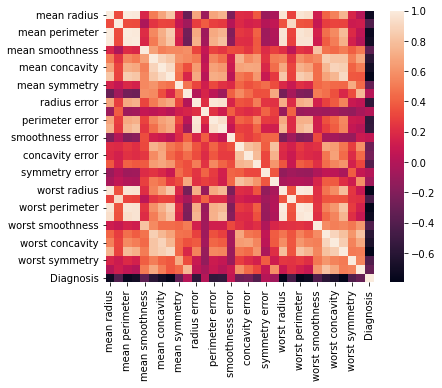

In [49]:
# co-relation matrix
plt.figure(figsize=(6,5))
sns.heatmap(df.corr())

In [50]:
df['Diagnosis'].value_counts()

1    357
0    212
Name: Diagnosis, dtype: int64

<AxesSubplot:>

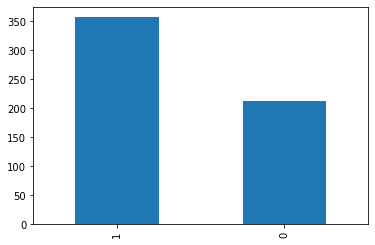

In [53]:
df['Diagnosis'].value_counts().plot.bar()

In [54]:
df.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

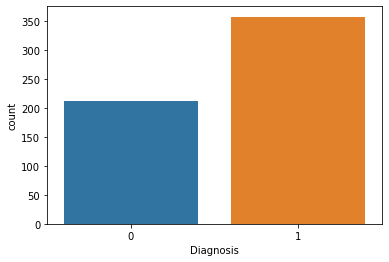

In [55]:
sns.countplot(x='Diagnosis',data=df)

In [56]:
X = df.drop(columns='Diagnosis', axis=1)
Y = df['Diagnosis']

**Splitting to training and testing data**

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [59]:
print(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape)

(455, 30) (455,) (114, 30) (114,)


**Standardizing the Data**

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)

In [61]:
#Currently, the data is in the form of [samples, features] -> 455 samples and 30 features
print(X_train_std.shape,Y_train.shape)

(455, 30) (455,)


In [62]:
#Currently, the data is in the form of [samples, features] -> 114 samples and 30 features
print(X_test_std.shape,Y_test.shape)

(114, 30) (114,)


In [63]:
# Reshape the data for input to LSTM
X_train_std_reshaped = X_train_std.reshape(X_train_std.shape[0], 1, X_train_std.shape[1])
X_test_std_reshaped = X_test_std.reshape(X_test_std.shape[0], 1, X_test_std.shape[1])

In [64]:
print(X_train_std_reshaped.shape)
print(X_test_std_reshaped.shape)

(455, 1, 30)
(114, 1, 30)


**Building LSTM Model**

In [65]:
tf.random.set_seed(3)
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, X_train_std_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(units=2, activation='sigmoid'))

In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 32)             8064      
                                                                 
 lstm_4 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 24,770
Trainable params: 24,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
# training the Neural Network
history = model.fit(X_train_std_reshaped, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
13/13 [==============================] - 23s 331ms/step - loss: 0.6872 - accuracy: 0.6235 - val_loss: 0.6762 - val_accuracy: 0.6739
Epoch 2/10
13/13 [==============================] - 0s 15ms/step - loss: 0.6665 - accuracy: 0.7042 - val_loss: 0.6435 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 17ms/step - loss: 0.6197 - accuracy: 0.8582 - val_loss: 0.5677 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 16ms/step - loss: 0.5196 - accuracy: 0.9193 - val_loss: 0.4250 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 15ms/step - loss: 0.3701 - accuracy: 0.9364 - val_loss: 0.2766 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 16ms/step - loss: 0.2467 - accuracy: 0.9438 - val_loss: 0.1957 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 15ms/step - loss: 0.1704 - accuracy: 0.9560 - val_loss: 0.1490 - val_accuracy: 0.9565
Epoch 8/10


**Visualizing Accuracy and Loss**

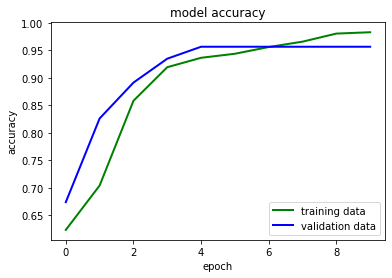

In [68]:
plt.plot(history.history['accuracy'],linewidth=2,color='green')
plt.plot(history.history['val_accuracy'],linewidth=2,color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

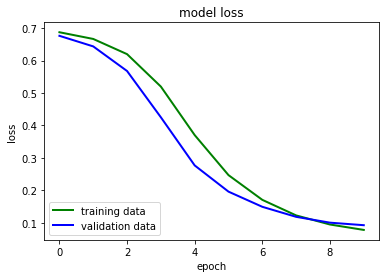

In [69]:
plt.plot(history.history['loss'],linewidth=2,color='green')
plt.plot(history.history['val_loss'],linewidth=2,color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower left')

In [70]:
loss, accuracy = model.evaluate(X_test_std_reshaped, Y_test)
print("Accuracy : " ,accuracy)
print("Loss :",loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9561
Accuracy :  0.9561403393745422
Loss : 0.10361745208501816


In [71]:
y_predicted_final = model.predict(X_test_std_reshaped)
y_predicted_final.shape
y_predicted_final[0]

4/4 [==============================] - 4s 5ms/step


array([0.19018263, 0.7780331 ], dtype=float32)

In [72]:
y_predicted_final

array([[0.19018263, 0.7780331 ],
       [0.32152432, 0.6580891 ],
       [0.06130877, 0.90346974],
       [0.92137176, 0.09087554],
       [0.27426162, 0.7016959 ],
       [0.9140133 , 0.09855612],
       [0.14450336, 0.8206617 ],
       [0.06244177, 0.9022182 ],
       [0.07610162, 0.8882354 ],
       [0.0710959 , 0.8933429 ],
       [0.3856635 , 0.59998465],
       [0.09434859, 0.8697519 ],
       [0.10596145, 0.8578568 ],
       [0.12252176, 0.84162927],
       [0.06827707, 0.8963124 ],
       [0.8787951 , 0.1349965 ],
       [0.06471984, 0.89991575],
       [0.07738674, 0.88689023],
       [0.07303571, 0.89114964],
       [0.9097658 , 0.10290787],
       [0.19663851, 0.773258  ],
       [0.06810506, 0.8962787 ],
       [0.06929778, 0.8952052 ],
       [0.06231825, 0.9024988 ],
       [0.10150946, 0.8623467 ],
       [0.9016804 , 0.11143062],
       [0.1027741 , 0.8611067 ],
       [0.17088783, 0.7954636 ],
       [0.89123756, 0.1223332 ],
       [0.8984012 , 0.11475645],
       [0.

In [73]:
#By adding the axis argument, numpy looks at the rows and columns individually.
#axis=0 means that the operation is performed across the rows of log_preds. ---> but column wise
#axis=1 means that the operation is performed across the columns of log_preds. ---> but row wise
#axis=-1 means that the operation is performed points horizontally across the columns.
y_pred = [np.argmax(i) for i in y_predicted_final] #from log probabilities to 0 or 1
y_pred

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]

**Building a predictive System**

In [85]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped.shape

(1, 30)

In [86]:
# standardizing the input vdata
input_data_std = sc.transform(input_data_reshaped)
input_data_std.shape

C:\Users\Priyanka Mishra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(1, 30)

In [87]:
# reshape input to be [samples, time steps, features]
input_data_reshaped_lstm = input_data_std.reshape(input_data_std.shape[0],1,input_data_std.shape[1])
input_data_reshaped_lstm.shape

(1, 1, 30)

In [88]:
prediction = model.predict(input_data_reshaped_lstm)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 42ms/step
[[0.9187526  0.09362443]]
[0]
The tumor is Malignant


**Saving the Model**

In [84]:
model.save('new_model.h5')